# RMSE barplots

Just a simple barplot comparing the RMSE for different models.

#### load packages

In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import datetime
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
import helper

# makes the figures higher quality.
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# load custom style
import matplotlib.style as style
plt.style.use("markerr.mplstyle")

#### load different models predicitons

In [2]:
zori_pred_lasso = pd.read_csv('zori_pred_lasso_base.csv',
                             index_col = 0, parse_dates = ['Time'])

zori_pred_rf = pd.read_csv('rand_forest_backtest_outlook.csv',
                           index_col = 0, parse_dates = ['Time'])

zori_pred_xg = pd.read_csv('xgboost_backtest_outlook.csv',
                           index_col = 0, parse_dates = ['Time'])


#### look at test window of predictions

In [3]:
zori_pred = pd.concat([zori_pred_lasso, zori_pred_rf, zori_pred_xg]).reset_index(drop = True)

zori_pred = zori_pred.loc[zori_pred['Time']<datetime.datetime(2021,7,2),:].reset_index(drop=True)
zori_pred = zori_pred.loc[zori_pred['Time']>datetime.datetime(2020,7,2),:].reset_index(drop=True)

#### making dataframe for different predictions

In [4]:
# actual values
act_values = zori_pred.loc[zori_pred['model_code']=='actual_values'
                          ][['Time','zip_code','zori_ssa']]
act_values.columns = ['Time','zip_code','actual_rent']
# lasso values
lasso = zori_pred.loc[zori_pred['model_code']=='lasso_base'].reset_index()
lasso_act = lasso.merge(act_values,how = 'left', on = ['Time','zip_code'])
# random forrest values
rf = zori_pred.loc[zori_pred['model_code']=='Random Forest'].reset_index()
rf_act = rf.merge(act_values,how = 'left', on = ['Time','zip_code'])
# xgboost values
xg = zori_pred.loc[zori_pred['model_code']=='Tree Based XGBoost'].reset_index()
xg_act = xg.merge(act_values,how = 'left', on = ['Time','zip_code'])

#### finding different models RMSE

In [9]:
# lasso
lasso_rmse = mean_squared_error(lasso_act['actual_rent'], lasso_act['zori_ssa'], squared=False)
# random forrest
rf_rmse = mean_squared_error(rf_act['actual_rent'], rf_act['zori_ssa'], squared=False)
# xg boost
xg_rmse = mean_squared_error(xg_act['actual_rent'], xg_act['zori_ssa'], squared=False)
# catboost rmse is what was reported to me.
cat_rmse = 66.18

#### constructing graph


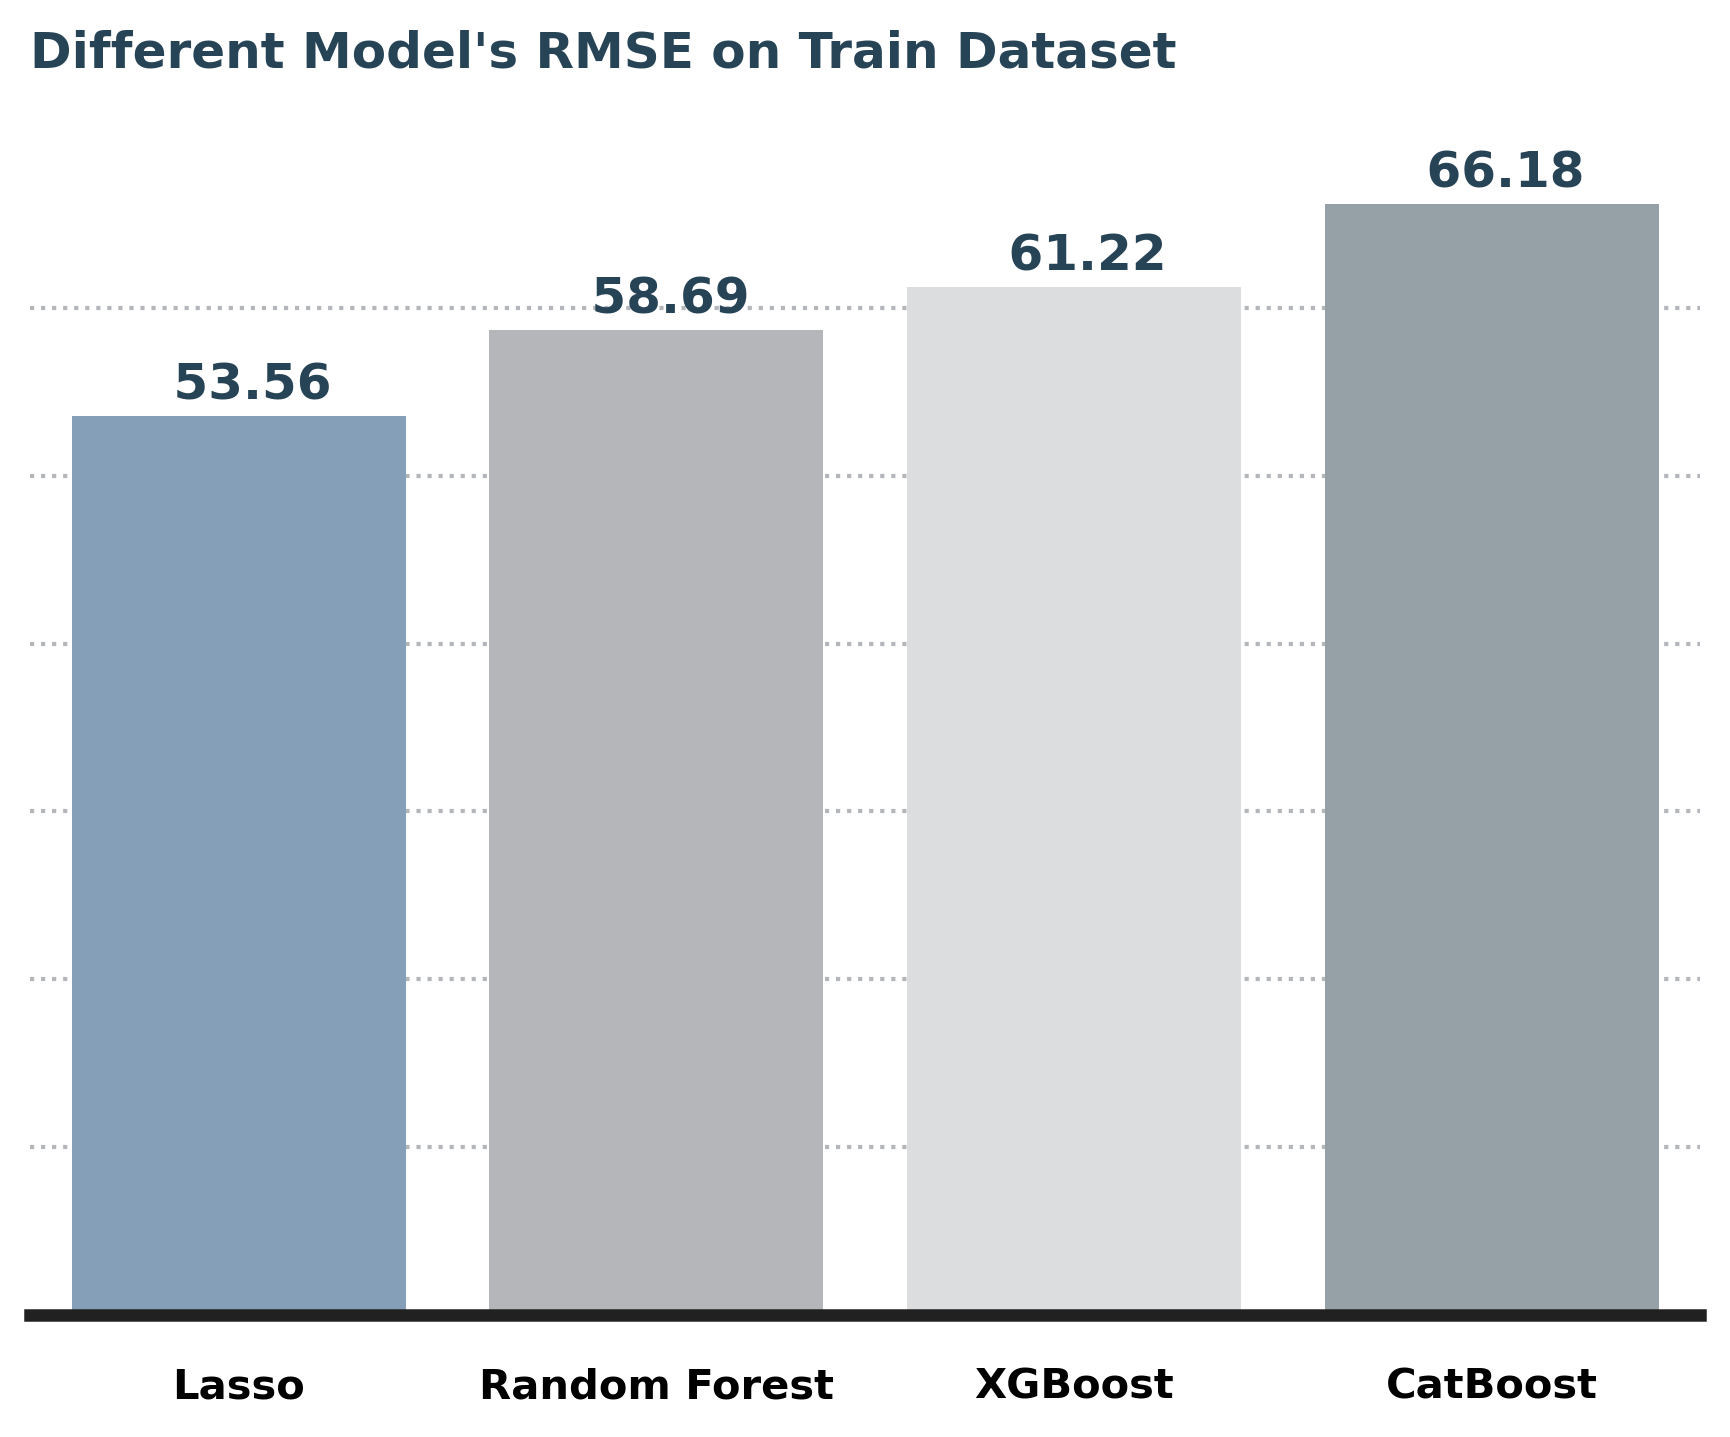

In [17]:
# making dataframe
rmse_df = pd.DataFrame({
    'model': ['Lasso','Random Forest','XGBoost', 'CatBoost'],
    'RMSE': [lasso_rmse, rf_rmse, xg_rmse, cat_rmse]
})
# make color palette
colors = ['#7BA0C0', '#B3B6BA','#dbddde','#93a1aa']
# making graph
fig, ax = plt.subplots()
g = sns.barplot(data = rmse_df, 
                x = 'model',y = 'RMSE', 
                ci = None,
                ax = ax, 
                 palette = colors
                )
# bold line along the x axis
ax.spines['bottom'].set_visible(True)
# make the highlighted features bold. should be the same side with the visible spine
plt.xticks(fontweight='bold')
# remove x axis grid lines that were cluttering the graph
ax.grid(b = None, axis = 'x')
# make axis labels and title
g.set(xlabel='', ylabel='',title=f"Different Model's RMSE on Train Dataset\n")
# remove x axis grid lines that were cluttering the graph. have to do it again cause?
ax.grid(b = None, axis = 'x')
# remove y ticks
g.set_yticklabels([])

# add rmse values above the bar
for p in g.patches:
    rmse_ = '    {:.2f}'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()+1
    ax.annotate(rmse_, (x, y), size = 12, 
                fontweight= 'bold', color = '#274456',
               horizontalalignment='center',)

plt.show()